<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


--------------------------------------------------------

### Project Idea: “Retailer Game Stock Advisor”
-------------------------------------------------------

#### Objective

- Predict which games are likely to sell the most.

- Recommend to Retailor which platforms, genres, or specific games distributor should buy to maximize revenue.

- Help avoid overstocking poorly performing games.

--------------------------------------------------------

Install the Libraries from Requirement.txt

These libraries are used for data loading preprocessing, modeling, and visualization.

--------------------------------------------------------

=> Import The Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

=> Dataset Description & Loading

Load the dataset

Remove missing values

Display structure and basic details

In [3]:
df = pd.read_csv("Video Game Sale.csv")
df = df.dropna(subset=["Global_Sales"])
df = df.dropna()

=> Analysis Objective

Goal: Predict Global_Sales using regression models

Benefit: Helps retailers/publishers identify high-sales games

=> FEATURE SELECTION

Dataset Overview

Feature Matrix (Inputs) - `X`

The model is trained using the following input features:

| Feature        | Description                                   |
|----------------|-----------------------------------------------|
| `Platform`     | Gaming platform (e.g., PS4, XBox, Switch)    |
| `Year`         | Year of release                               |
| `Genre`        | Game genre (e.g., Action, Sports, RPG)       |
| `Publisher`    | Company that published the game              |
| `NA_Sales`     | Sales in North America (millions of units)   |
| `EU_Sales`     | Sales in Europe (millions of units)          |
| `JP_Sales`     | Sales in Japan (millions of units)           |
| `Other_Sales`  | Sales in other regions (millions of units)   |

Target Variable - `y`

The model learns to predict the **global sales** of a game:

| Target         | Description                                   |
|----------------|-----------------------------------------------|
| `Global_Sales` | Total worldwide sales (millions of units)    |


In [4]:
X = df[
    [
        "Platform",
        "Year",
        "Genre",
        "Publisher",
        "NA_Sales",
        "EU_Sales",
        "JP_Sales",
        "Other_Sales",
    ]
]
y = df["Global_Sales"]

categorical = ["Platform", "Genre", "Publisher"]
numerical = ["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

=> Preprocessing Pipeline


Model Pipeline Overview

- **Preprocessor**
  - Converts categorical columns (Platform, Genre, Publisher) into numbers  
  - Leaves numerical columns unchanged  
  - Can handle new/unseen categories during prediction  

- **Pipeline**
  - Combines preprocessing with a Random Forest model (200 trees, random_state=42)  
  - Provides a single workflow for training and prediction  

- **Purpose**
  - Ensure consistent data processing  
  - Predict global sales accurately



In [5]:
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numerical),
    ]
)


rf_model = Pipeline(
    [
        ("prep", preprocessor),
        ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)),
    ]
)

- Trains the pipeline on features `X` and target `y` becomes a fitted pipeline ready for predictions

In [6]:
rf_model.fit(X, y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Genre',
                                                   'Publisher']),
                                                 ('num', 'passthrough',
                                                  ['Year', 'NA_Sales',
                                                   'EU_Sales', 'JP_Sales',
                                                   'Other_Sales'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

Predicting Top Games for a Year

- **Year input:** User enters the year for predictions  
- **Data preparation:**  
  - If the year exists in data, use existing rows  
  - Otherwise, create rows with all platform-genre-publisher combinations and average sales for numeric columns  
  - Assign default game names if missing  

- **Prediction:**  
  - Select relevant features (`Platform`, `Year`, `Genre`, `Publisher`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`)  
  - Use `rf_model.predict` to estimate `Predicted_Global_Sales`  

- **Output:**  
  - Sort games by predicted sales  
  - Let user choose how many top games to display based on retailer capacity


In [7]:
year_input = int(input("Enter the year for which you want predictions: "))


if year_input in df["Year"].values:
    df_year = df[df["Year"] == year_input].copy()
else:
    df_year = df[["Platform", "Genre", "Publisher"]].drop_duplicates().copy()
    df_year["Year"] = year_input
    df_year["NA_Sales"] = df["NA_Sales"].mean()
    df_year["EU_Sales"] = df["EU_Sales"].mean()
    df_year["JP_Sales"] = df["JP_Sales"].mean()
    df_year["Other_Sales"] = df["Other_Sales"].mean()

if "Name" in df.columns:
    df_year["Game_Name"] = df_year.get(
        "Name", ["Game " + str(i + 1) for i in range(len(df_year))]
    )
else:
    df_year["Game_Name"] = ["Game " + str(i + 1) for i in range(len(df_year))]

X_year = df_year[
    [
        "Platform",
        "Year",
        "Genre",
        "Publisher",
        "NA_Sales",
        "EU_Sales",
        "JP_Sales",
        "Other_Sales",
    ]
]
df_year["Predicted_Global_Sales"] = rf_model.predict(X_year)

df_sorted = df_year.sort_values("Predicted_Global_Sales", ascending=False).reset_index(
    drop=True
)


max_games = int(input("Enter the number of games the retailer can stock: "))
top_games = df_sorted.head(max_games).sort_values(
    "Predicted_Global_Sales", ascending=False
)

Predicted Global Sales Plot

The plot provides an intuitive visual comparison of predicted sales across all games for a specific year (`year_input`).

- **X-axis:** Games, sorted by predicted sales (individual labels are hidden for clarity).  

- **Y-axis:** Predicted global sales in millions. 

- **Line and Markers:** Each game’s predicted sales is represented by a blue line with circular markers.  




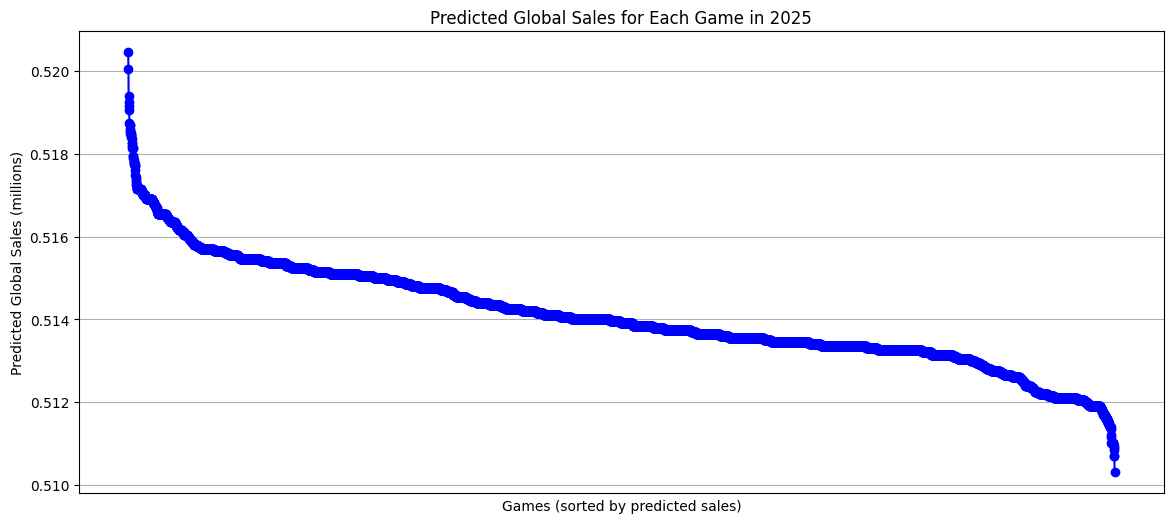

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(
    df_sorted.index,
    df_sorted["Predicted_Global_Sales"],
    marker="o",
    linestyle="-",
    color="blue",
)
plt.xticks([])
plt.xlabel("Games (sorted by predicted sales)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title(f"Predicted Global Sales for Each Game in {year_input}")
plt.grid(True)
plt.show()

Recommended Games to Stock

This section lists the **top recommended games to stock** for the selected year (`year_input`) based on predicted global sales. 

- Each game is displayed with:
  - **Rank** (based on predicted sales)
  - **Game Name**
  - **Platform**
  - **Genre**
  - **Predicted Global Sales** (in millions, rounded to 2 decimal places)




In [9]:
print(f"\nRecommended Games to Stock in {year_input}:")
for i, row in top_games.iterrows():
    print(
        f"{i+1}. {row['Game_Name']} - Platform: {row['Platform']}, Genre: {row['Genre']}, Predicted Sales: {row['Predicted_Global_Sales']:.2f}M"
    )


Recommended Games to Stock in 2025:
1. Game 446 - Platform: PSV, Genre: Shooter, Predicted Sales: 0.52M
2. Game 707 - Platform: PSP, Genre: Shooter, Predicted Sales: 0.52M
3. Game 959 - Platform: PSV, Genre: Role-Playing, Predicted Sales: 0.52M
4. Game 2701 - Platform: PSV, Genre: Fighting, Predicted Sales: 0.52M
5. Game 282 - Platform: PSP, Genre: Fighting, Predicted Sales: 0.52M
6. Game 1707 - Platform: PSP, Genre: Role-Playing, Predicted Sales: 0.52M
7. Game 252 - Platform: PS, Genre: Shooter, Predicted Sales: 0.52M
8. Game 179 - Platform: PS2, Genre: Shooter, Predicted Sales: 0.52M
9. Game 1157 - Platform: PSV, Genre: Sports, Predicted Sales: 0.52M
10. Game 3741 - Platform: PSV, Genre: Adventure, Predicted Sales: 0.52M
11. Game 1911 - Platform: PSP, Genre: Simulation, Predicted Sales: 0.52M
12. Game 4769 - Platform: PSV, Genre: Misc, Predicted Sales: 0.52M
13. Game 544 - Platform: PSV, Genre: Platform, Predicted Sales: 0.52M
14. Game 151 - Platform: PS4, Genre: Shooter, Predicted 